# FMskill assignment

You are working on a project modelling waves in the Southern North Sea. You have done 6 different calibration runs and want to choose the "best". You would also like to see how you best model is performing compared to a third-party model in NetCDF. 

The data: 

* SW model results: 6 dfs0 files ts_runX.dfs0 each with 4 items corresponding to 4 stations
* observations: 4 dfs0 files with station data for (name, longitude, latitude):
    - F16: 4.0122, 54.1167
    - HKZA: 4.0090, 52.3066
    - K14: 3.6333, 53.2667
    - L9: 4.9667, 53.6167
* A map observations_map.png showing the model domain and observation positions
* Third party model: 1 NetCDF file

The tasks:

1. Calibration - find the best run
2. Validation - compare model to third-party model

In [1]:
fldr = "../data/FMskill_assignment/"   # where have you put your data? 

In [2]:
from fmskill import PointObservation, ModelResult, Connector
import fmskill

## 1. Calibration

* 1.1 Start simple: compare F16 with SW1 (the first calibration run)
* 1.2 Define all observations and all model results
* 1.3 Create connector, plot temporal coverage
* 1.4 Evaluate results
* 1.5 Which model is best?

### 1.1 Simple compare

Use fmskill.compare to do a quick comparison of F16 and SW1. 

What is the mean absolute error in cm? 
Do a time series plot.

<AxesSubplot:title={'center':'F16'}, ylabel='Significant wave height [m]'>

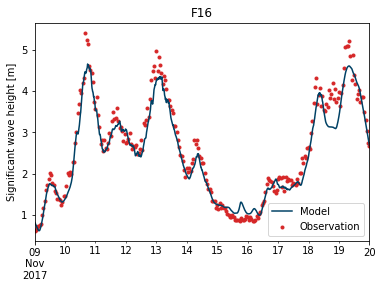

In [3]:
c = fmskill.compare(fldr + "F16.dfs0", fldr + "ts_run5.dfs0", mod_item=1)
c.plot_timeseries()

In [11]:
c.skill(metrics="mae")

,n,mae
observation,,
F16,265,0.638778


### 1.2 Define all observations and all model results

* Define 4 PointObservations o1, o2, o3, o4
* Define 6 ModelResults mr1, mr2, ...
* How many items do the ModelResults have?  

In [4]:
#o1 = PointObservation(fldr + "F16.dfs0", x=4.0122, y=54.1167)
#o2 = PointObservation(fldr + "HKZA.dfs0",x=4.0090,y=52.3066)
o1 = PointObservation(fldr + "F16.dfs0")

In [5]:
mr1 = ModelResult(fldr + "ts_run1.dfs0", item=1)
mr2 = ModelResult(fldr + "ts_run2.dfs0", item=2)
mr3 = ModelResult(fldr + "NWS_HM0.nc", name="NWS", item="VHM0")

### 1.3 Create connector, plot temporal coverage

* Create empty Connector con
* The add the connections one observation at a time (start by matching o1 with the 6 models, then o2...)
* Print con to screen - which observation has most observation points? 
* Plot the temporal coverage of observations and models
* Save the Connector to an excel configuration file

In [6]:
con = Connector()
con.add(o1, [mr1, mr2, mr3])

In [7]:
con.connections

{'F16': <PointConnector> obs=F16(n=719) :: 3 models=[ts_run1, t...]}

In [8]:
 cc =con.extract()

ValueError: PointObservation '{observation.name}' cannot be used for extraction because it has None position x={x}, y={y}. Please provide position when creating PointObservation.

### 1.4 Evaluate results

Do relevant qualitative and quantitative analysis (e.g. time series plots, scatter plots, skill tables etc) to compare the models. 

In [35]:
cc.skill().style()

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
ts_run1,F16,265,-0.156,0.299,0.255,0.222,0.982,0.089,0.939
ts_run2,F16,265,-0.203,0.393,0.337,0.285,0.967,0.117,0.895


### 1.5 Find the best

Which calibration run is best? 

* Which model performs best in terms of bias? 
* Which model has the smallest scatter index? 
* Which model has linear slope closest to 1.0 for the station HKZA? 
* Consider the last day only (Nov 19) - which model has the smallest bias for that day? 
* Weighted: Give observation F16 10-times more weight than the other observations - which has the smallest MAE?  
* Extremes: Which model has lowest rmse for Hs>4.0  (df = cc.all_df[cc.all_df.obs_val>4])?


## 2. Validation

We will now compare our best model against the UK MetOffice's North West Shelf model stored in NWS_HM0.nc. 

* 2.1 Create a ModelResult mr_NWS, evaluate mr_NWS.ds
* 2.2 Plot the first time step (hint .isel(time=0)) of ds (hint: the item is called "VHM0")
* 2.3 Create a Connector con_NWS with the 4 observations and mr_NWS 
* 2.4 Evaluate NWS - what is the mean rmse? 
* 2.5 Compare NWS to SW5 - which model is better? And is it so for all stations and all metrics? (hint: you can merge ComparisonCollections using the + operator)